In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
#read the data
bikes = pd.read_csv("hour.csv")

In [3]:
#prelim analysis of data
bikes_prep = bikes.copy()
bikes_prep = bikes_prep.drop(['index','date','casual','registered'], axis=1)

In [4]:
#checking missing values
bikes_prep.isnull().sum()

season        0
year          0
month         0
hour          0
holiday       0
weekday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
demand        0
dtype: int64

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

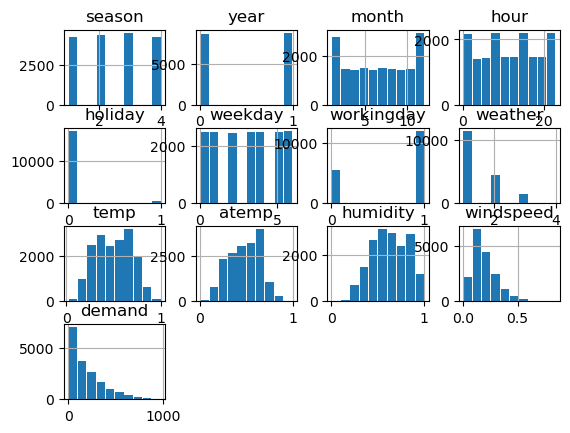

In [5]:
#lets visualise the data
bikes_prep.hist(rwidth=0.9)
plt.tight_layout

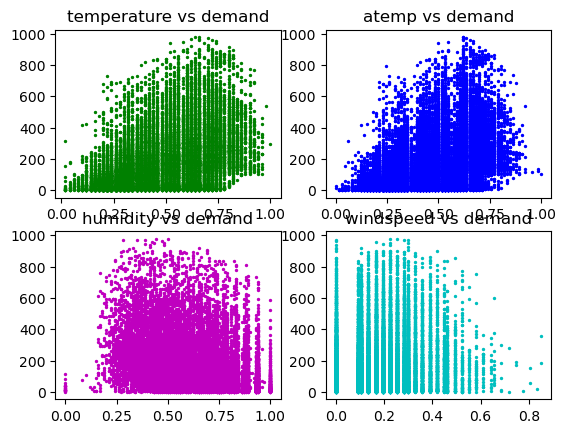

In [6]:
plt.subplot(2,2,1)
plt.title('temperature vs demand')
plt.scatter(bikes_prep['temp'],bikes_prep['demand'],s=2,c='g')
plt.subplot(2,2,2)
plt.title('atemp vs demand')
plt.scatter(bikes_prep['atemp'],bikes_prep['demand'],s=2,c='b')
plt.subplot(2,2,3)
plt.title('humidity vs demand')
plt.scatter(bikes_prep['humidity'],bikes_prep['demand'],s=2,c='m')
plt.subplot(2,2,4)
plt.title('windspeed vs demand')
plt.scatter(bikes_prep['windspeed'],bikes_prep['demand'],s=2,c='c')

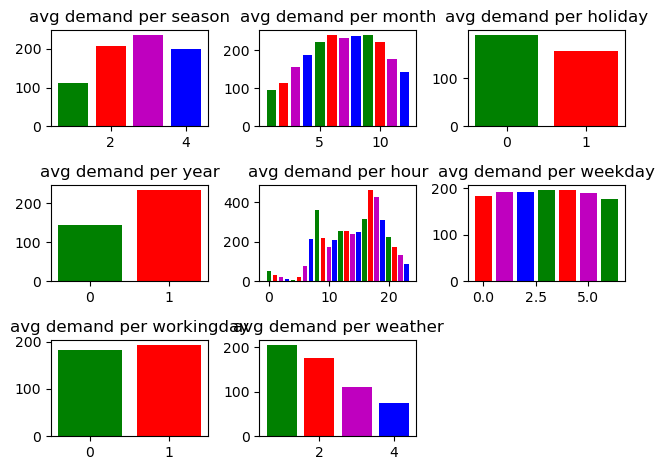

In [7]:
#lets visualise the categorical data vs demand
c = ['g','r','m','b']
plt.subplot(3,3,1)
plt.title('avg demand per season')
cat_list = bikes_prep['season'].unique()
cat_average = bikes_prep.groupby('season').mean()['demand']
plt.bar(cat_list,cat_average,color=c)

plt.subplot(3,3,2)
plt.title('avg demand per month')
cat_list = bikes_prep['month'].unique()
cat_average = bikes_prep.groupby('month').mean()['demand']
plt.bar(cat_list,cat_average,color=c)

plt.subplot(3,3,3)
plt.title('avg demand per holiday')
cat_list = bikes_prep['holiday'].unique()
cat_average = bikes_prep.groupby('holiday').mean()['demand']
plt.bar(cat_list,cat_average,color=c)

plt.subplot(3,3,4)
plt.title('avg demand per year')
cat_list = bikes_prep['year'].unique()
cat_average = bikes_prep.groupby('year').mean()['demand']
plt.bar(cat_list,cat_average,color=c)

plt.subplot(3,3,5)
plt.title('avg demand per hour')
cat_list = bikes_prep['hour'].unique()
cat_average = bikes_prep.groupby('hour').mean()['demand']
plt.bar(cat_list,cat_average,color=c)

plt.subplot(3,3,6)
plt.title('avg demand per weekday')
cat_list = bikes_prep['weekday'].unique()
cat_average = bikes_prep.groupby('weekday').mean()['demand']
plt.bar(cat_list,cat_average,color=c)

plt.subplot(3,3,7)
plt.title('avg demand per workingday')
cat_list = bikes_prep['workingday'].unique()
cat_average = bikes_prep.groupby('workingday').mean()['demand']
plt.bar(cat_list,cat_average,color=c)

plt.subplot(3,3,8)
plt.title('avg demand per weather')
cat_list = bikes_prep['weather'].unique()
cat_average = bikes_prep.groupby('weather').mean()['demand']
plt.bar(cat_list,cat_average,color=c)

plt.tight_layout()
#as we can see that in demand vs year graph we have data of only 2 year but we dont know what will happen in the future so we will drop it
#in demand vs weekday graph it shows very little variation hence it has no effect on our data so we will drop it
#same in demand vs working day graph

In [8]:
#lets check for outliers
bikes_prep['demand'].describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: demand, dtype: float64

In [9]:
 bikes_prep['demand'].quantile([0.05,0.1,0.15,0.9,0.95,0.99])

0.05      5.00
0.10      9.00
0.15     16.00
0.90    451.20
0.95    563.10
0.99    782.22
Name: demand, dtype: float64

In [10]:
correlation = bikes_prep[['temp','atemp','humidity','windspeed','demand']].corr()

In [11]:
correlation
#we will drop atemp as it is highly correlated with temp
#we will drop windspeed as it has nearly no correlation with demand

,temp,atemp,humidity,windspeed,demand
temp,1.000000,0.987672,-0.069881,-0.023125,0.404772
atemp,0.987672,1.000000,-0.051918,-0.062336,0.400929
humidity,-0.069881,-0.051918,1.000000,-0.290105,-0.322911
windspeed,-0.023125,-0.062336,-0.290105,1.000000,0.093234
demand,0.404772,0.400929,-0.322911,0.093234,1.000000


In [12]:
bikes_prep = bikes_prep.drop(['atemp','windspeed','year','weekday','workingday'],axis=1)

(array([-12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,
          1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12]),
 array([0.45474735, 0.4704957 , 0.4962283 , 0.49404088, 0.46795952,
        0.47732028, 0.5267577 , 0.5914576 , 0.65201604, 0.715196  ,
        0.80591005, 0.9253097 , 1.        , 0.9253096 , 0.80591005,
        0.71519613, 0.65201604, 0.5914576 , 0.52675766, 0.47732028,
        0.46795952, 0.49404094, 0.4962282 , 0.4704957 , 0.45474735],
       dtype=float32),
 <matplotlib.lines.Line2D at 0x20e1d0687d0>)

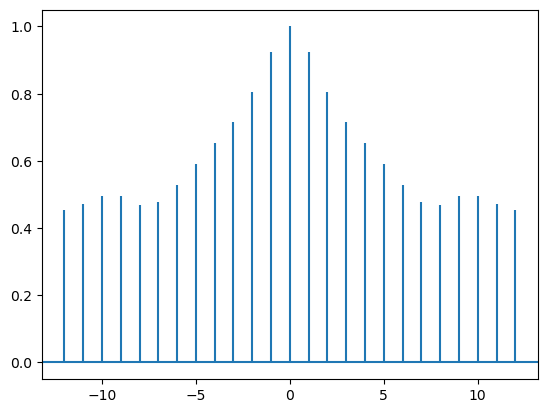

In [13]:
df1 = pd.to_numeric(bikes_prep['demand'],downcast='float')
plt.acorr(df1,maxlags=12)

<Axes: >

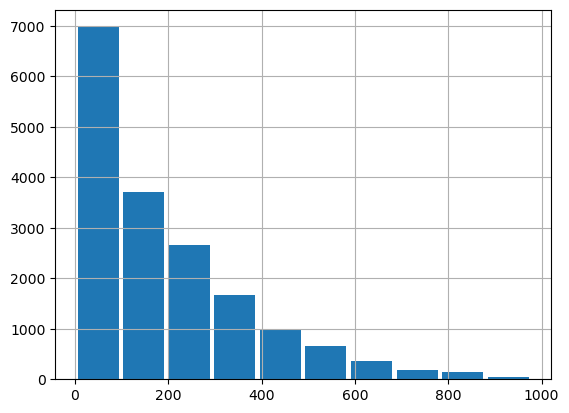

In [17]:
#lets check the the normalityv of demand
bikes_prep['demand'].hist(rwidth=0.9)
#it is in log distribution that is if we convert its value in log then we can see the normal distribution pattern

<Axes: >

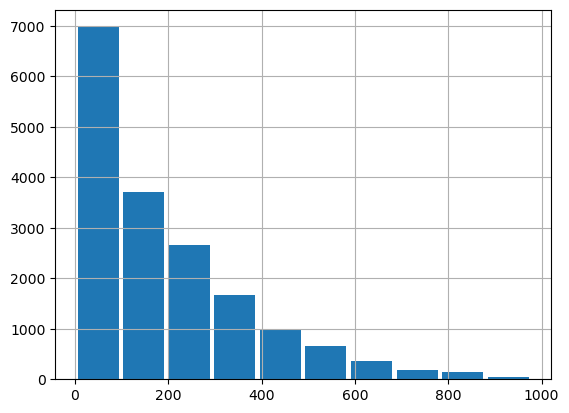

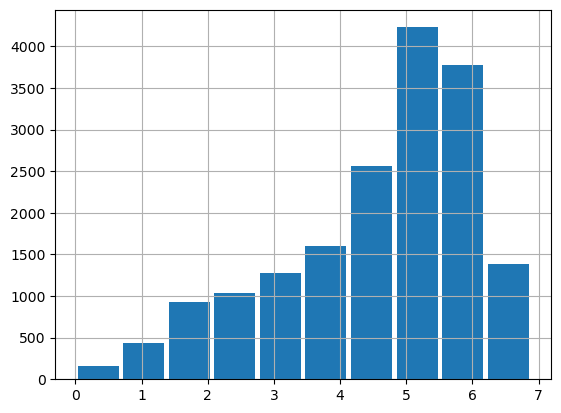

In [19]:
df1 = bikes_prep['demand']
df2 = np.log(df1)
plt.figure()
df1.hist(rwidth = 0.9)
plt.figure()
df2.hist(rwidth = 0.9)
#in df2 we can see the normal distribution trend 

In [20]:
#now we will change the values of demand in log
bikes_prep['demand'] = np.log(bikes_prep['demand'])

In [31]:
#auto correlation in demand
t_1 = bikes_prep['demand'].shift(+1).to_frame()
t_1.columns = ['t-1']
t_2 = bikes_prep['demand'].shift(+2).to_frame()
t_2.columns = ['t-2']
t_3 = bikes_prep['demand'].shift(+3).to_frame()
t_3.columns = ['t-3']
bikes_prep_lag = pd.concat([bikes_prep,t_1,t_2,t_3],axis=1)


In [32]:
bikes_prep_lag

,season,month,hour,holiday,weather,temp,humidity,demand,t-1,t-2,t-3
0,1,1,0,0,1,0.24,0.81,2.772589,NaN,NaN,NaN
1,1,1,1,0,1,0.22,0.80,3.688879,2.772589,NaN,NaN
2,1,1,2,0,1,0.22,0.80,3.465736,3.688879,2.772589,NaN
3,1,1,3,0,1,0.24,0.75,2.564949,3.465736,3.688879,2.772589
4,1,1,4,0,1,0.24,0.75,0.000000,2.564949,3.465736,3.688879
...,...,...,...,...,...,...,...,...,...,...,...
17374,1,12,19,0,2,0.26,0.60,4.779123,4.804021,5.099866,5.365976
17375,1,12,20,0,2,0.26,0.60,4.488636,4.779123,4.804021,5.099866
17376,1,12,21,0,1,0.26,0.60,4.499810,4.488636,4.779123,4.804021
17377,1,12,22,0,1,0.26,0.56,4.110874,4.499810,4.488636,4.779123


In [33]:
bikes_prep_lag = bikes_prep_lag.dropna()

In [34]:
bikes_prep_lag.dtypes
#to create dummy variables we need to convert there value to categorical

season        int64
month         int64
hour          int64
holiday       int64
weather       int64
temp        float64
humidity    float64
demand      float64
t-1         float64
t-2         float64
t-3         float64
dtype: object

In [37]:
bikes_prep_lag['season'] = bikes_prep_lag['season'].astype('category')
bikes_prep_lag['month'] = bikes_prep_lag['month'].astype('category')
bikes_prep_lag['hour'] = bikes_prep_lag['hour'].astype('category')
bikes_prep_lag['holiday'] = bikes_prep_lag['holiday'].astype('category')
bikes_prep_lag['weather'] = bikes_prep_lag['weather'].astype('category')

C:\Users\milind\AppData\Local\Temp\ipykernel_8360\1481263664.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bikes_prep_lag['season'] = bikes_prep_lag['season'].astype('category')
C:\Users\milind\AppData\Local\Temp\ipykernel_8360\1481263664.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bikes_prep_lag['month'] = bikes_prep_lag['month'].astype('category')
C:\Users\milind\AppData\Local\Temp\ipykernel_8360\1481263664.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

In [40]:
bikes_prep_lag = pd.get_dummies(bikes_prep_lag,drop_first=True)

In [46]:
bikes_prep_lag

,temp,humidity,demand,t-1,t-2,t-3,season_2,season_3,season_4,month_2,...,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,holiday_1,weather_2,weather_3,weather_4
3,0.24,0.75,2.564949,3.465736,3.688879,2.772589,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.24,0.75,0.000000,2.564949,3.465736,3.688879,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0.24,0.75,0.000000,0.000000,2.564949,3.465736,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,0.22,0.80,0.693147,0.000000,0.000000,2.564949,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0.20,0.86,1.098612,0.693147,0.000000,0.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,0.26,0.60,4.779123,4.804021,5.099866,5.365976,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
17375,0.26,0.60,4.488636,4.779123,4.804021,5.099866,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
17376,0.26,0.60,4.499810,4.488636,4.779123,4.804021,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
17377,0.26,0.56,4.110874,4.499810,4.488636,4.779123,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [49]:
#lets create the train and test data
Y = bikes_prep_lag[['demand']]
X = bikes_prep_lag.drop(['demand'],axis=1)
#crate the size for 70% of data
tr_size = 0.7 * len(X)
tr_size = int(tr_size)
#lets create x train,x test, y train, y test
X_train = X.values[0 : tr_size]
X_test = X.values[tr_size : len(X)]
Y_train = Y.values[0 : tr_size]
Y_test = Y.values[tr_size : len(Y)]

In [58]:
from sklearn.linear_model import LinearRegression

std_reg = LinearRegression()
std_reg.fit(X_train, Y_train)

r2_train = std_reg.score(X_train, Y_train)
r2_test  = std_reg.score(X_test, Y_test)


# Create Y Predictions
Y_predict = std_reg.predict(X_test)


from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(Y_test, Y_predict))

In [64]:
print(r2_train)
print(r2_test)
print(rmse)


0.9195240591465778
0.9287151360253386
0.38098800498170415


In [66]:
Y_test_e = []
Y_predict_e = []

for i in range(0, len(Y_test)):
    Y_test_e.append(math.exp(Y_test[i]))
    Y_predict_e.append(math.exp(Y_predict[i]))

log_sq_sum = 0.0

for i in range(0, len(Y_test_e)):
    log_a = math.log(Y_test_e[i] + 1)
    log_p = math.log(Y_predict_e[i] + 1)
    log_diff = (log_p - log_a)**2
    log_sq_sum = log_sq_sum + log_diff

rmsle = math.sqrt(log_sq_sum/len(Y_test))

print(rmsle)


0.3560941706980208
